In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#get csv file location
city_data = "./raw_data/city_data.csv"
ride_data = "./raw_data/ride_data.csv"

#read city data
city_df = pd.read_csv(city_data)

# #group by city and type to to get driver count (this will account for duplicates)
# driver_count = city_df.groupby(["city", "type"])["driver_count"].sum()

# #create data frame for grouped city data
# city_grouped = pd.DataFrame({"driver_count" : driver_count}).reset_index()

In [3]:
# #read ride data
ride_df = pd.read_csv(ride_data)

# #group by ride city to get ride and ride count and fare average and sum total
total_rides = ride_df.groupby("city")["ride_id"].count()
avg_fare = ride_df.groupby("city")["fare"].mean()
sum_fare = ride_df.groupby("city")["fare"].sum()

# #create dataframe with grouped ride data
ride_grouped = pd.DataFrame({"total_rides": total_rides
                             ,"avg_fare": avg_fare
                             ,"sum_fares":sum_fare}).reset_index()

#merge city and ride data into one dataframe
merge_df = pd.merge(city_df, ride_grouped, how="outer", on="city")

#previous merged city and ride data
merge_df.head()


,city,driver_count,type,avg_fare,sum_fares,total_rides
0,Kelseyland,63,Urban,21.806429,610.58,28
1,Nguyenbury,8,Urban,25.899615,673.39,26
2,East Douglas,12,Urban,26.169091,575.72,22
3,West Dawnfurt,34,Urban,22.330345,647.58,29
4,Rodriguezburgh,52,Urban,21.332609,490.65,23


In [4]:
#merge city and ride data into one dataframe
# merge_df = pd.merge(city_df, ride_df, how="outer", on="city")

# #group by ride city to get ride and ride count and fare average and sum total, and driver count
# total_rides = merge_df.groupby(["city","type"])["ride_id"].count()
# avg_fare = merge_df.groupby(["city","type"])["fare"].mean()
# sum_fare = merge_df.groupby(["city","type"])["fare"].sum()
# driver_count = merge_df.groupby(["city","type"])["driver_count"].sum()


# # #create dataframe with grouped ride data
# merge_group = pd.DataFrame({"total_rides": total_rides
#                             ,"avg_fare": avg_fare
#                             ,"sum_fares":sum_fare
#                             ,"driver_count": driver_count}).reset_index()
# merge_group.head()

In [5]:
# create dataframes for each city type
urban_df = merge_df.loc[(merge_df["type"] == "Urban")]
suburban_df =  merge_df.loc[(merge_df["type"] == "Suburban")]
rural_df = merge_df.loc[(merge_df["type"] == "Rural")]

urban_df.head()


,city,driver_count,type,avg_fare,sum_fares,total_rides
0,Kelseyland,63,Urban,21.806429,610.58,28
1,Nguyenbury,8,Urban,25.899615,673.39,26
2,East Douglas,12,Urban,26.169091,575.72,22
3,West Dawnfurt,34,Urban,22.330345,647.58,29
4,Rodriguezburgh,52,Urban,21.332609,490.65,23


<function matplotlib.pyplot.show>

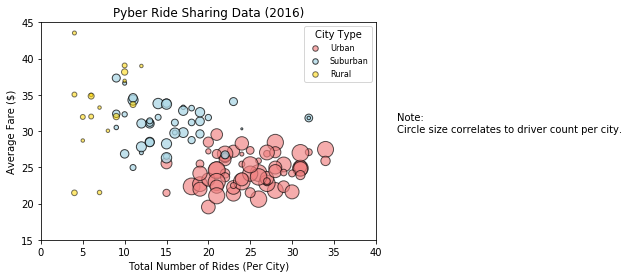

In [6]:
#create x and y axis and size for each city type
xu= urban_df['total_rides']
yu=urban_df['avg_fare']
su=[n*4 for n in urban_df['driver_count']]

xs= suburban_df['total_rides']
ys= suburban_df['avg_fare']
ss=[n*4 for n in suburban_df['driver_count']]

xr= rural_df['total_rides']
yr= rural_df['avg_fare']
sr=[n*4 for n in rural_df['driver_count']]


#plot each city type in a scatter plot
plt.scatter(xu,yu,s=su, c='lightcoral', label = 'Urban', alpha = .65, edgecolor = 'black', linewidth=1)
plt.scatter(xs,ys,s=ss, c='lightblue', label = 'Suburban',alpha = .75, edgecolor = 'black', linewidth=1)
plt.scatter(xr,yr,s=sr, c='gold', label = 'Rural', alpha = .55, edgecolor = 'black', linewidth=1)

#limit the x and y axix
plt.ylim(15, 45)
plt.xlim(0,40)

# format the legend
lgnd = plt.legend(scatterpoints=1, loc='best', numpoints=1, title="City Type"
           , fontsize=8)

# format size markers in legend
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# display plot title and x and y labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

#display footnote to right of plot
plt.figtext(0.95, 0.5, 'Note:\nCircle size correlates to driver count per city.', horizontalalignment='left') 

#display plot
plt.show

<function matplotlib.pyplot.show>

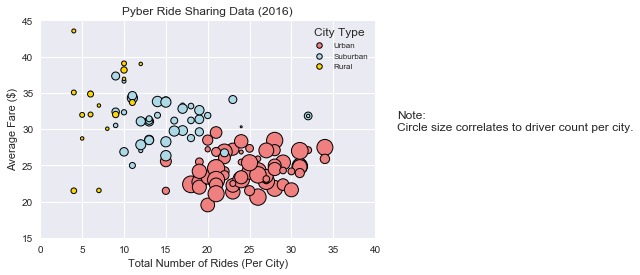

In [7]:
#import seaborn library
import seaborn as sns
#set seaborn plot to display
sns.set()

#create x and y axis and size for each city type
xu= urban_df['total_rides']
yu=urban_df['avg_fare']
su=[n*4 for n in urban_df['driver_count']]

xs= suburban_df['total_rides']
ys= suburban_df['avg_fare']
ss=[n*4 for n in suburban_df['driver_count']]

xr= rural_df['total_rides']
yr= rural_df['avg_fare']
sr=[n*4 for n in rural_df['driver_count']]


#plot each city type in a scatter plot
plt.scatter(xu,yu,s=su, c='lightcoral', label = 'Urban', edgecolor = 'black', linewidth=1)
plt.scatter(xs,ys,s=ss, c='lightblue', label = 'Suburban', edgecolor = 'black', linewidth=1)
plt.scatter(xr,yr,s=sr, c='gold', label = 'Rural', edgecolor = 'black', linewidth=1)

#limit the x and y axix
plt.ylim(15, 45)
plt.xlim(0,40)

# format the legend
lgnd = plt.legend(scatterpoints=1, loc='best', numpoints=1, title="City Type"
           , fontsize=8)

# format size markers in legend
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# display plot title and x and y labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

#display footnote to right of plot
plt.figtext(0.95, 0.5, 'Note:\nCircle size correlates to driver count per city.', horizontalalignment='left') 

#display plot
plt.show

In [8]:
#group fares by type and get percent of total of all fares
sum_fares = merge_df.groupby("type")["sum_fares"].sum()
sum_sum_fares = merge_df.groupby("type")["sum_fares"].sum().sum()
fares_pct = sum_fares/sum_sum_fares

#create data set for grouped data
fares_pie = pd.DataFrame({"Fares" : sum_fares
                          ,"Pct_Fares" : fares_pct})

#preview grouped data
fares_pie.head()

,Fares,Pct_Fares
type,,
Rural,4255.09,0.065798
Suburban,20335.69,0.314458
Urban,40078.34,0.619745


<function matplotlib.pyplot.show>

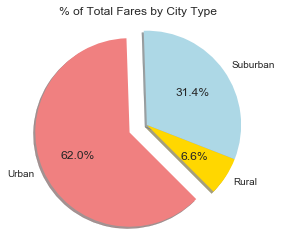

In [9]:
#list types of cities for labels
types = ["Rural", "Suburban", "Urban"]

#get percent of total for each city type
pct_fare = fares_pie["Pct_Fares"]

#list pie slice color
colors = ["gold", "lightblue",  "lightcoral" ]

#explode Urban pie slice
explode = (0, 0, 0.2)

#create pie chart
plt.pie(pct_fare, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-45)

#make pie chart axis to make a scaled
plt.axis("scaled")

#create chart title
plt.title("% of Total Fares by City Type")

#display pie chart
plt.show

In [11]:
#group merge data by type to get total_rides and percent of total of all rides
sum_ride = merge_df.groupby("type")["total_rides"].sum()
sum_sum_rides = merge_df.groupby("type")["total_rides"].sum().sum()
rides_pct = sum_ride/sum_sum_rides

#create dataframe for grouped data
rides_pie = pd.DataFrame({" Total Rides" : sum_ride
                          ,"Pct Rides" : rides_pct})

#preview grouped data
rides_pie.head()

,Total Rides,Pct Rides
type,,
Rural,125,0.051932
Suburban,657,0.272954
Urban,1625,0.675114


<function matplotlib.pyplot.show>

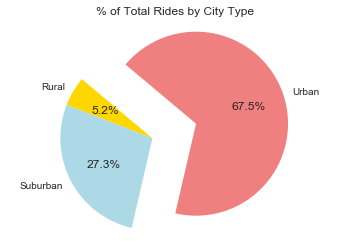

In [16]:
#list types of cities for labels
types = ["Rural", "Suburban", "Urban"]

#get percent of total for each city type
rides_pct = rides_pie["Pct Rides"]

#list pie slice color
colors = ["gold", "lightblue",  "lightcoral" ]

#explode Urban pie slice
explode = (0, 0, 0.5)

#plot and format pie chart 
plt.pie(rides_pct, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)

#make axis equal
plt.axis("equal")

#create title
plt.title("% of Total Rides by City Type")

#diplay pie chart
plt.show

In [13]:
#group merge data by type to get driver count and percent of total of all rides
sum_drivers = merge_df.groupby("type")["driver_count"].sum()
sum_sum_drivers = merge_df.groupby("type")["driver_count"].sum().sum()
drivers_pct = sum_drivers/sum_sum_drivers

#create dataframe for grouped data
drivers_pie = pd.DataFrame({" Total Drivers" : sum_drivers
                          ,"Pct Drivers" : drivers_pct})
#get preview
drivers_pie.head()

,Total Drivers,Pct Drivers
type,,
Rural,104,0.031054
Suburban,638,0.190505
Urban,2607,0.778441


<function matplotlib.pyplot.show>

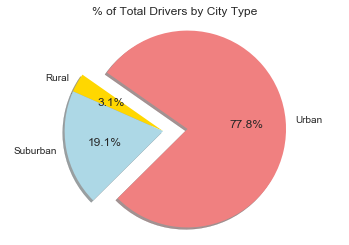

In [14]:
#list types of cities for labels
types = ["Rural", "Suburban", "Urban"]

#get percent of total for each city type
drivers_pct = drivers_pie["Pct Drivers"]

#list pie slice color
colors = ["gold", "lightblue",  "lightcoral" ]

#explode Urban pie slice
explode = (0, 0, 0.25)

#plot and format pie chart 
plt.pie(drivers_pct, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145)

#plot equal axis
plt.axis("equal")

#create title for pie chart
plt.title("% of Total Drivers by City Type")

#display pie chart
plt.show